In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the dataset
data = pd.read_csv('../data/MachineLearningRating_v3.txt',  delimiter='|')
data.head()

/tmp/ipykernel_23068/731353094.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt',  delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [20]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / data.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing data
missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


In [21]:
# Dropping columns with too many missing values (>60%)
columns_to_drop = ['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate', 
                   'WrittenOff', 'Converted', 'Rebuilt', 'VehicleIntroDate']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


In [22]:
# Fill missing values for categorical columns
categorical_cols = ['NewVehicle', 'Bank', 'AccountType', 'Gender', 'MaritalStatus', 
                    'mmcode', 'VehicleType', 'make', 'bodytype', 'Model']
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

# Fill missing values for numerical columns with the median
numerical_cols = ['NumberOfDoors', 'kilowatts', 'cubiccapacity', 'Cylinders']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Drop rows with missing 'CapitalOutstanding' values (only 2 missing)
data = data.dropna(subset=['CapitalOutstanding'])


/tmp/ipykernel_23068/801363765.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)
/tmp/ipykernel_23068/801363765.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data[col].fillna('Unknown', inplace=True)
/tmp/ipykernel_23068/801363765.py:10: FutureWarning: A value is trying to be set on a copy of a Dat

In [23]:
# Descriptive statistics for numerical features like TotalPremium and TotalClaims
descriptive_stats = data[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']].describe()
print("Descriptive Statistics for Numerical Features:\n", descriptive_stats)


Descriptive Statistics for Numerical Features:
        TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm
count  1.000096e+06  1.000096e+06  1.000096e+06              1.000096e+06
mean   6.190553e+01  6.486132e+01  6.041639e+05              1.178758e+02
std    2.302847e+02  2.384077e+03  1.508321e+06              3.997021e+02
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04


In [24]:
# Reviewing data types and structure
print("\nData Types of Each Column:\n", data.dtypes)


Data Types of Each Column:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                       object
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object

In [25]:
# Checking for any remaining missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])



Missing Values:
 Series([], dtype: int64)


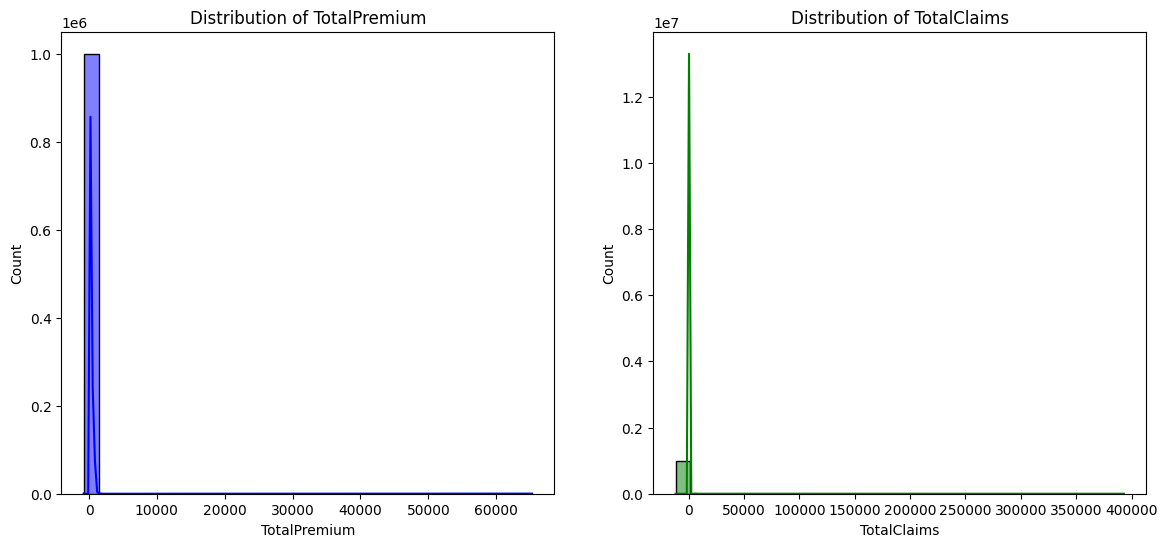

In [26]:
# Histogram for numerical variables (TotalPremium, TotalClaims)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['TotalPremium'], bins=30, kde=True, color='blue')
plt.title('Distribution of TotalPremium')

plt.subplot(1, 2, 2)
sns.histplot(data['TotalClaims'], bins=30, kde=True, color='green')
plt.title('Distribution of TotalClaims')
plt.show()

/tmp/ipykernel_23068/4111031255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Province', palette='viridis')


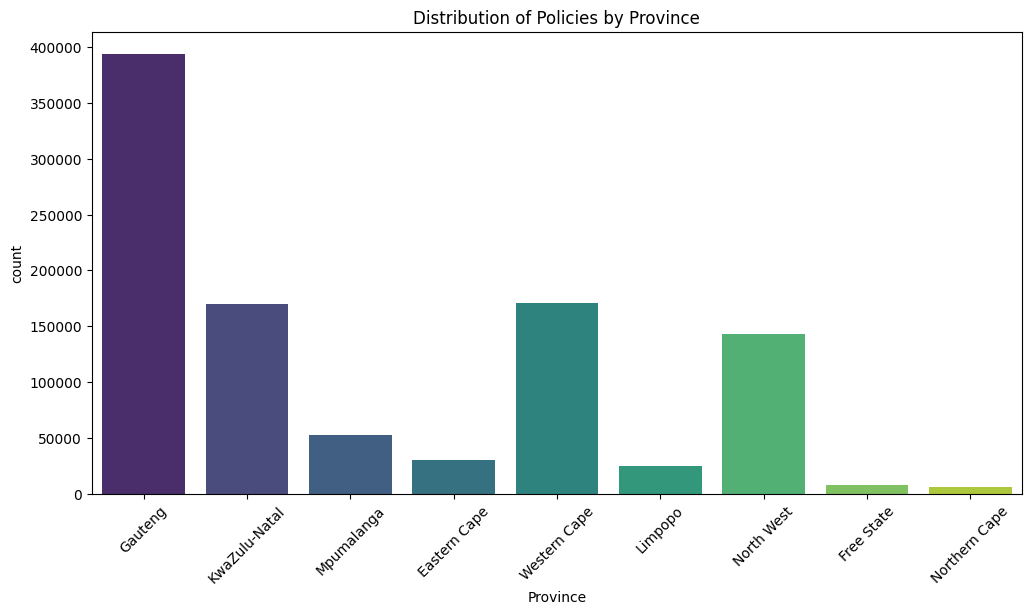

/tmp/ipykernel_23068/4111031255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='magma')


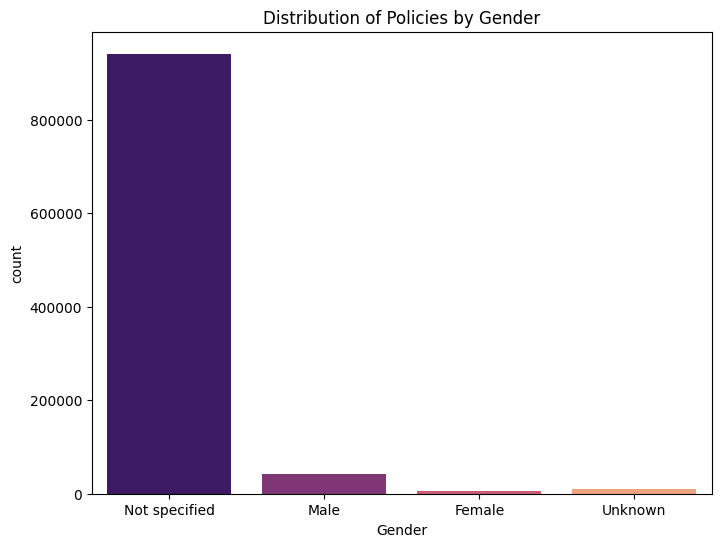

In [27]:
# Bar chart for categorical variables (Province, Gender)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Province', palette='viridis')
plt.title('Distribution of Policies by Province')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', palette='magma')
plt.title('Distribution of Policies by Gender')
plt.show()


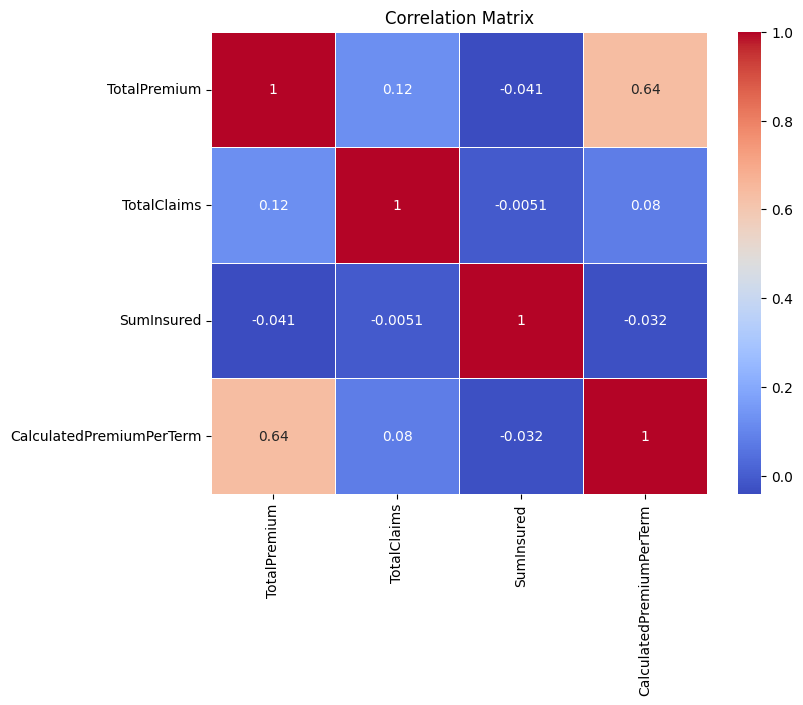

In [28]:
# Correlation matrix for numerical variables
corr_matrix = data[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


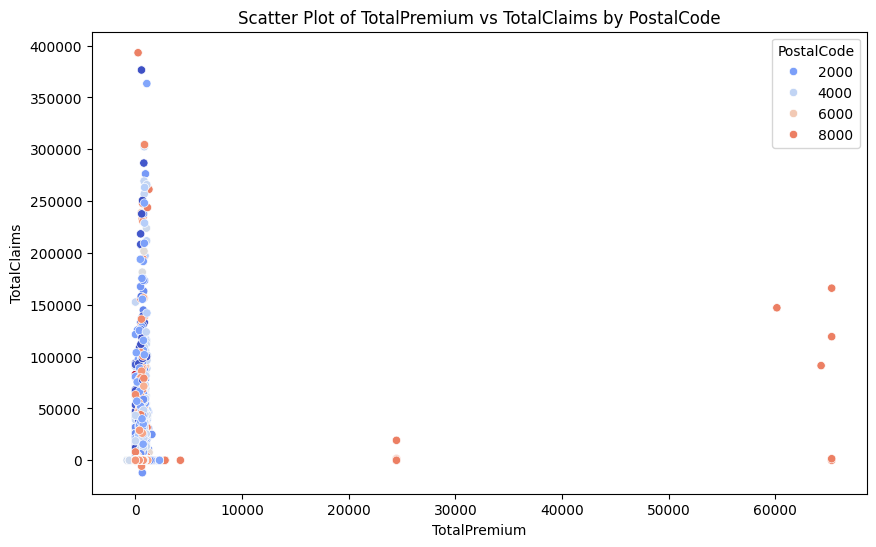

In [29]:
# Scatter plot between TotalPremium and TotalClaims by PostalCode
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='coolwarm')
plt.title('Scatter Plot of TotalPremium vs TotalClaims by PostalCode')
plt.show()



/tmp/ipykernel_23068/3273809544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='CoverType', palette='viridis')


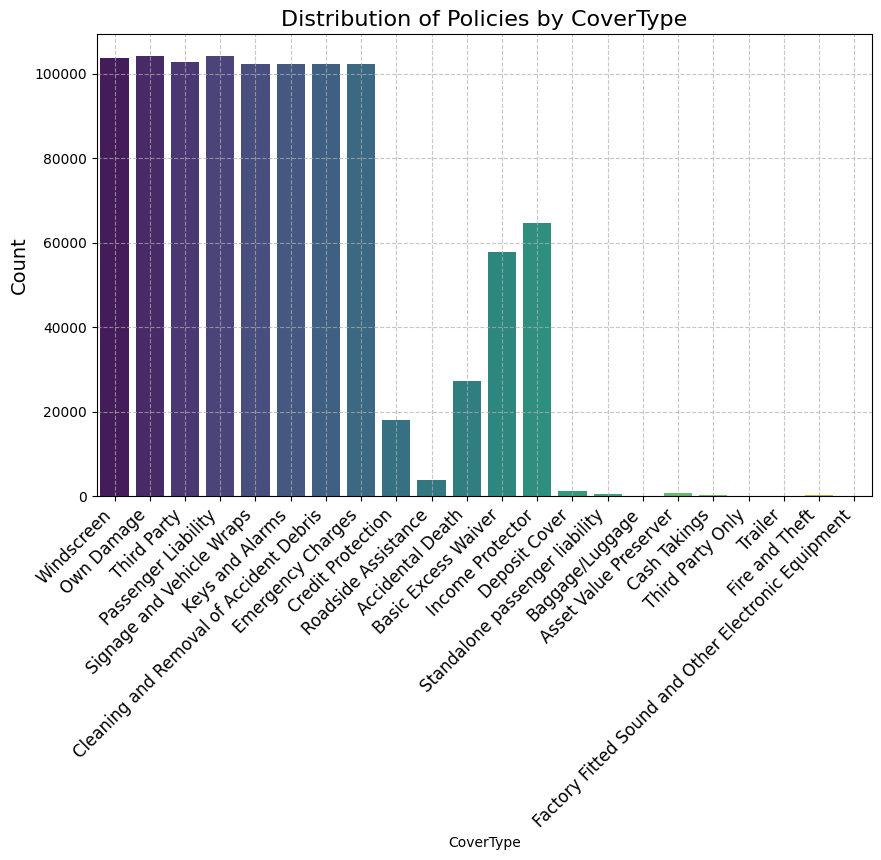

In [30]:
# Bar chart for CoverType
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='CoverType', palette='viridis')
plt.title('Distribution of Policies by CoverType', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Visualization

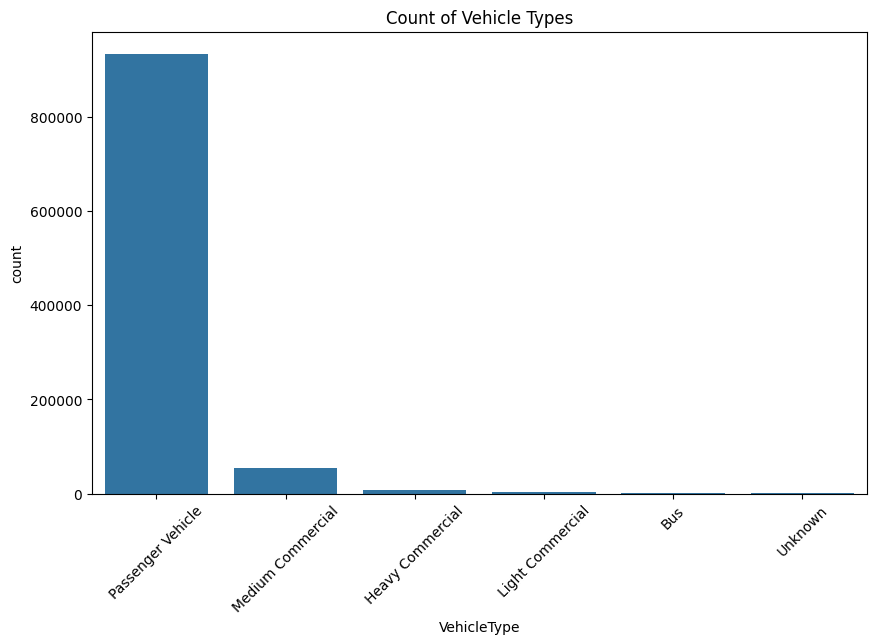

In [31]:
# Bar chart for VehicleType
plt.figure(figsize=(10,6))
sns.countplot(x='VehicleType', data=data)
plt.title('Count of Vehicle Types')
plt.xticks(rotation=45)
plt.show()


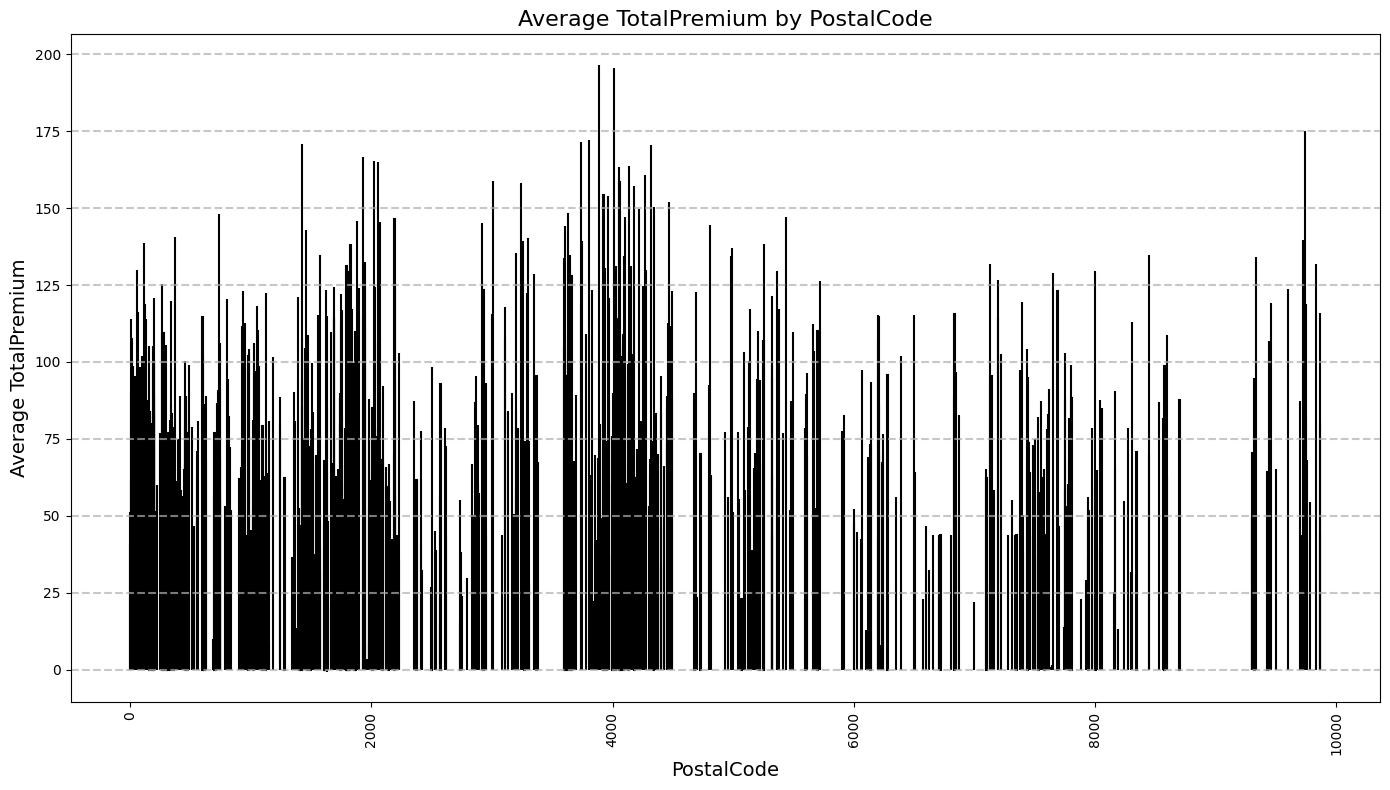

In [32]:

# Aggregate data by PostalCode
aggregated_data = data.groupby('PostalCode').agg({'TotalPremium': 'mean', 'TotalClaims': 'mean'}).reset_index()

plt.figure(figsize=(14, 8))

# Bar plot for TotalPremium with thicker bars and enhanced color
plt.bar(aggregated_data['PostalCode'], aggregated_data['TotalPremium'], color='dodgerblue', edgecolor='black', linewidth=1.5)
plt.title('Average TotalPremium by PostalCode', fontsize=16)
plt.xlabel('PostalCode', fontsize=14)
plt.ylabel('Average TotalPremium', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=1.5, alpha=0.7)  # Thicker grid lines
plt.tight_layout()

plt.show()



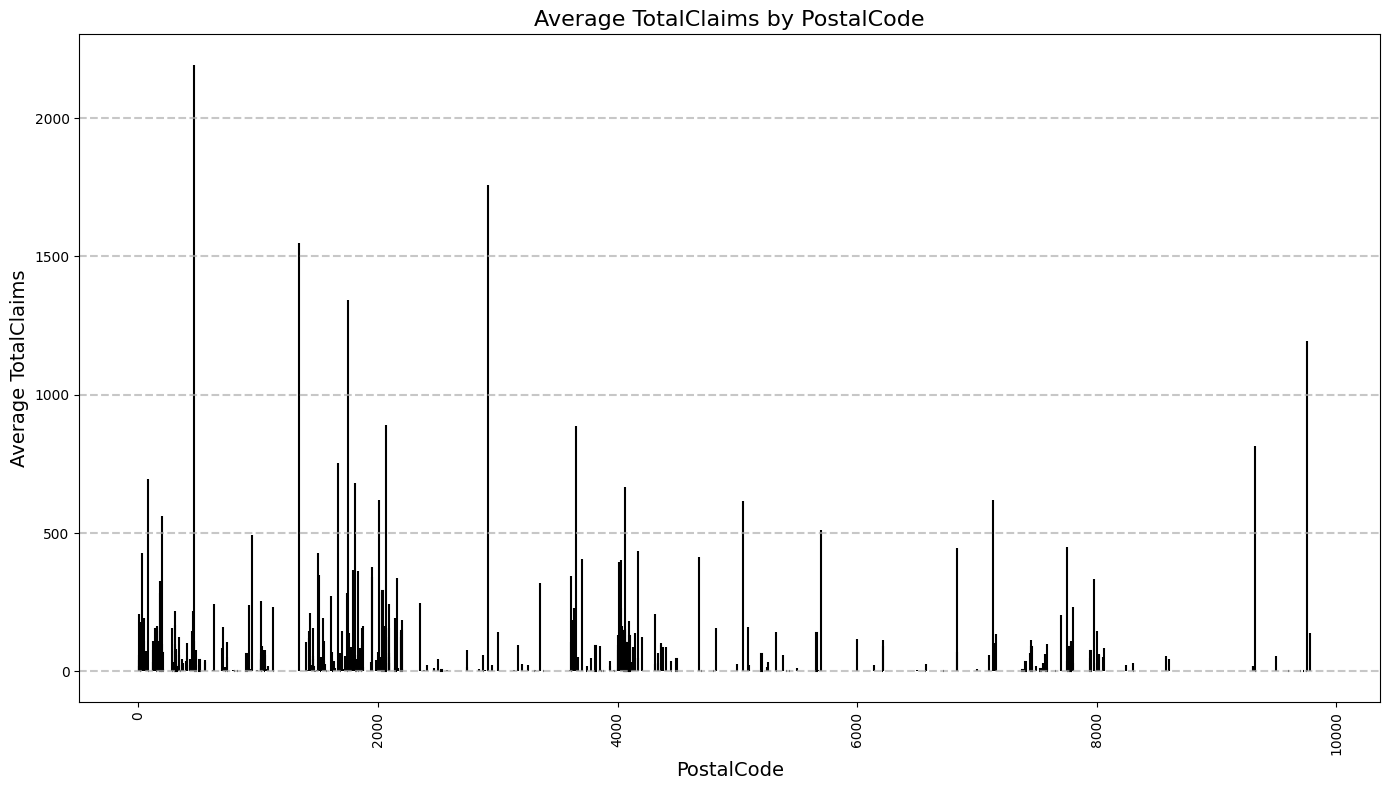

In [33]:
plt.figure(figsize=(14, 8))

# Bar plot for TotalClaims with thicker bars and enhanced color
plt.bar(aggregated_data['PostalCode'], aggregated_data['TotalClaims'], color='mediumseagreen', edgecolor='black', linewidth=1.5)
plt.title('Average TotalClaims by PostalCode', fontsize=16)
plt.xlabel('PostalCode', fontsize=14)
plt.ylabel('Average TotalClaims', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=1.5, alpha=0.7)
plt.tight_layout()

plt.show()


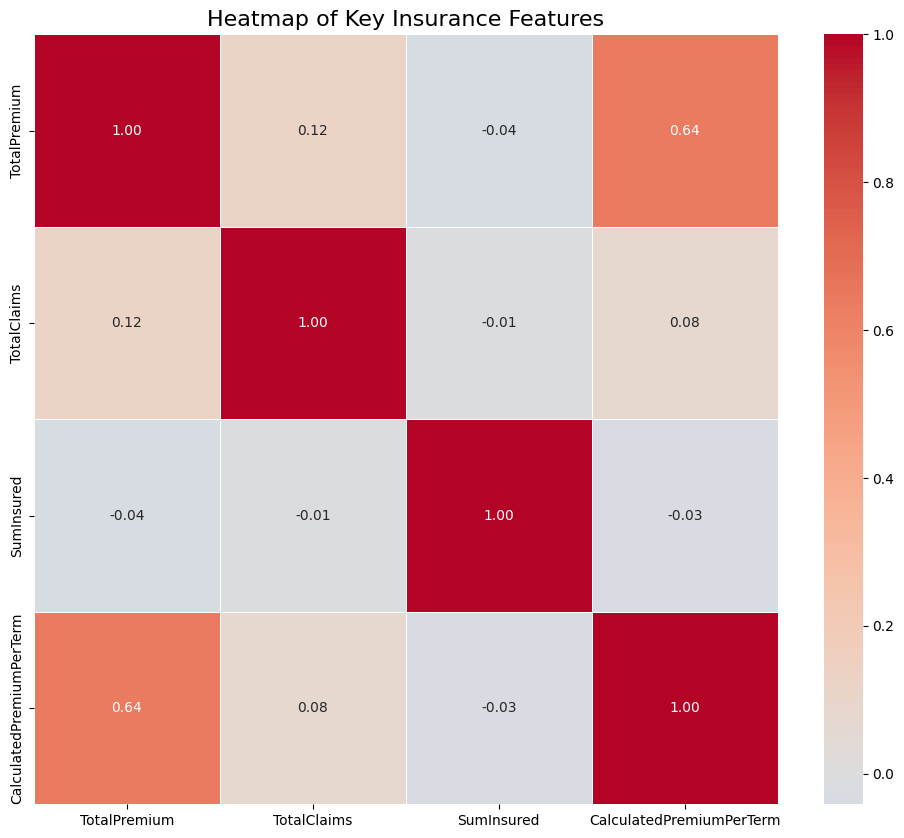

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f', annot_kws={'size': 10})
plt.title('Heatmap of Key Insurance Features', fontsize=16)
plt.show()
